**All tests for (b)** 

In [2]:
from imports import *
from sklearn import datasets
from classes import NeuralNetwork, GradientDescent
#from functions import mse, cross_entropy, mse_der, sigmoid, sigmoid_der, reLU, ReLU_der, identity, identity_der, accuracy, cross_entropy, polynomial_features
from functions import *
import classes
import functions
import imports
import importlib

importlib.reload(classes) 
importlib.reload(functions)
importlib.reload(imports)

<module 'imports' from 'c:\\Users\\kdoug\\OneDrive\\Documents\\UiO\\Høst 2025\\FYS-STK4155\\Project-2\\Code\\imports.py'>

In [3]:
# Stochastic Gradient Descent, batch_size=32. Runtime ~ 1m32s

state=50
datapoints=1000
noise_std=0.01

X_train, X_test, Y_train, Y_test, x_train, x_test, y_train, y_test = create_and_scale_data(state, datapoints, noise_std)

epochs = [10,100,500,1000,2000,5000]
etas = [1e-5, 1e-4, 1e-3, 1e-2,2e-1, 1e-1]

plot_matrix = np.zeros((len(epochs), len(etas)))
for i, epoch in enumerate(epochs):
    for e, eta in enumerate(etas):
        linreg = NeuralNetwork(1, [50,1], [sigmoid, identity], [sigmoid_der, identity_der], mse, mse_der)
        linreg.train_SGD_v2(X_train, y_train, epochs=epoch, batch_size=32, learning_rate=eta)
        pred = linreg.feed_forward(X_test)
        pointMse = mse(y_test, pred)
        plot_matrix[i,e] = pointMse


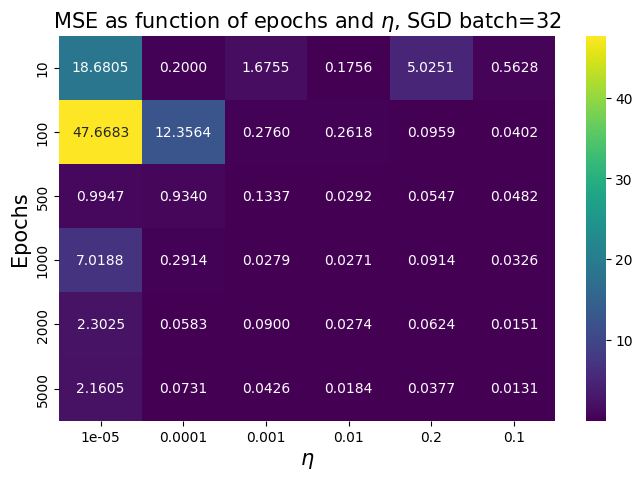

In [4]:
# Plotting: Stochastic Gradient Descent, batch_size=32

save_dir = os.path.join(os.path.dirname(os.getcwd()), "Figures")

os.makedirs(save_dir, exist_ok=True)

fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(plot_matrix, annot=True, fmt=".4f", cmap="viridis", ax=ax, xticklabels=etas, yticklabels=epochs)
ax.set_xlabel(r"$\eta$", fontsize=15)
ax.set_ylabel("Epochs", fontsize=15)
ax.set_title(r"MSE as function of epochs and $\eta$, SGD batch=32", fontsize=15)

save_path = os.path.join(save_dir, "V2_HM_plainSGD.png")
fig.savefig(save_path, dpi=300, bbox_inches='tight')

The best param for SGD seems to be {$\eta$=0.1, 2000 epochs}.  
Checking batch and data size for SGD using these parameters:

In [5]:
# SGD, fixed epoch and eta, varying data size and batch size. Runtime ~ 4m

state=50
noise_std=0.01
eta=0.1
epoch=2000


datapoints = [100,500,1000,5000]
batches = [8,16,32,64]

plot_matrix = np.zeros((len(datapoints), len(batches)))
for i, dp in enumerate(datapoints):
    for b, batch in enumerate(batches):
        X_train, X_test, Y_train, Y_test, x_train, x_test, y_train, y_test = create_and_scale_data(state, dp, noise_std=noise_std)
        linreg = NeuralNetwork(1, [50,1], [sigmoid, identity], [sigmoid_der, identity_der], mse, mse_der)
        linreg.train_SGD_v2(X_train, y_train, epochs=epoch, batch_size=batch, learning_rate=eta)
        pred = linreg.feed_forward(X_test)
        pointMse = mse(y_test, pred)
        plot_matrix[i,b] = pointMse

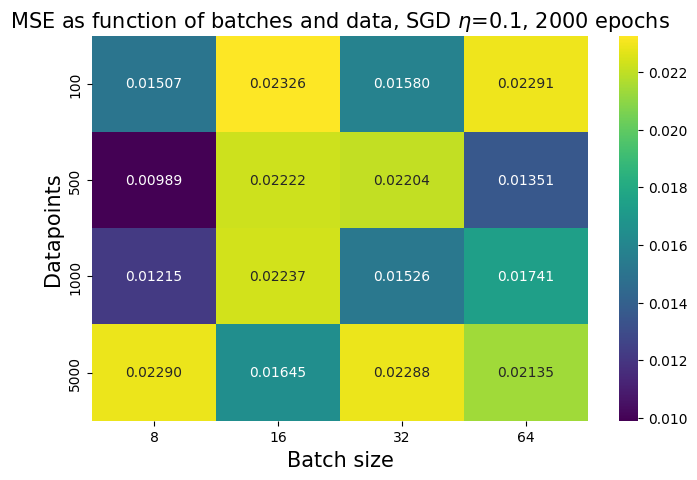

In [6]:
# Plotting: SGD, fixed epoch and eta, varying data size and batch size.
save_dir = os.path.join(os.path.dirname(os.getcwd()), "Figures")

os.makedirs(save_dir, exist_ok=True)

fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(plot_matrix, annot=True, fmt=".5f", cmap="viridis", ax=ax, xticklabels=batches, yticklabels=datapoints)
ax.set_xlabel("Batch size", fontsize=15)
ax.set_ylabel("Datapoints", fontsize=15)
ax.set_title("MSE as function of batches and data, SGD $\eta$=0.1, 2000 epochs", fontsize=15)

save_path = os.path.join(save_dir, "V2_HM_SGD_batchsize_datapoints.png")
fig.savefig(save_path, dpi=300, bbox_inches='tight')

We note that there is no significant datapoint dependence, and that batch sizes below 32 give the best results. We'll use batch=16 where possible, but will increase to 32 when necessary. Data size of 1000 for convenience.

In [7]:
# Adam, varying eta and epochs. Runtime ~ 5m for batch=32, ~ 9m for batch=16

state=50
datapoints=1000
noise_std=0.01

X_train, X_test, Y_train, Y_test, x_train, x_test, y_train, y_test = create_and_scale_data(state, datapoints, noise_std)

epochs = [10,100,500,1000,2000,5000]
etas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1,2e-1]

plot_matrix = np.zeros((len(epochs), len(etas)))
for i, epoch in enumerate(epochs):
    for e, eta in enumerate(etas):
        linreg = NeuralNetwork(1, [50,1], [sigmoid, identity], [sigmoid_der, identity_der], mse, mse_der)
        linreg.train_SGD_v2(X_train, y_train, epochs=epoch, batch_size=32, learning_rate=eta, functional=NN_ADAM)
        pred = linreg.feed_forward(X_test)
        pointMse = mse(y_test, pred)
        plot_matrix[i,e] = pointMse

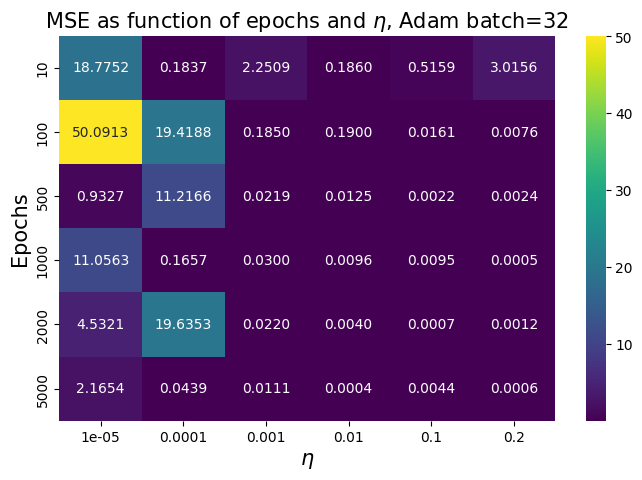

In [8]:
# Plotting: Adam, varying eta and epochs. Batch = 32
save_dir = os.path.join(os.path.dirname(os.getcwd()), "Figures")
os.makedirs(save_dir, exist_ok=True)

fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(plot_matrix, annot=True, fmt=".4f", cmap="viridis", ax=ax, xticklabels=etas, yticklabels=epochs)
ax.set_xlabel(r"$\eta$", fontsize=15)
ax.set_ylabel("Epochs", fontsize=15)
ax.set_title(r"MSE as function of epochs and $\eta$, Adam batch=32", fontsize=15)

save_path = os.path.join(save_dir, "V2_HM_ADAM_SGD.png")
fig.savefig(save_path, dpi=300, bbox_inches='tight')

A batch size of 16 for ADAM is not enough of an improvement to justify computation increase. (Same order of magnitude for lower values).  
I put the best params for Adam with batch=32 to be {$\eta$=0.01, 1000 epochs}, or alternatively {$\eta$=0.01, 2000 epochs}.  

Test for best {$\beta_1, \beta_2$} values with $\eta$=0.1, epochs=2000 for ADAM fullbatch: Decided to use standard beta values of {$\beta_1=0.9, \beta_2=0.999$}

Tuning hyperparameters for RMS prop fullbatch. Finding the best set {$\eta$, epochs} that minimizes MSE

In [9]:
# Adam, NEW ACTFUNC

state=50
datapoints=1000
noise_std=0.01

X_train, X_test, Y_train, Y_test, x_train, x_test, y_train, y_test = create_and_scale_data(state, datapoints, noise_std)

epochs = [10,100,500,1000,2000,5000]
etas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1,2e-1]

plot_matrix = np.zeros((len(epochs), len(etas)))
for i, epoch in enumerate(epochs):
    for e, eta in enumerate(etas):
        linreg = NeuralNetwork(1, [50,1], [reLU, identity], [ReLU_der, identity_der], mse, mse_der)
        linreg.train_SGD_v2(X_train, y_train, epochs=epoch, batch_size=32, learning_rate=eta, functional=NN_ADAM)
        pred = linreg.feed_forward(X_test)
        pointMse = mse(y_test, pred)
        plot_matrix[i,e] = pointMse

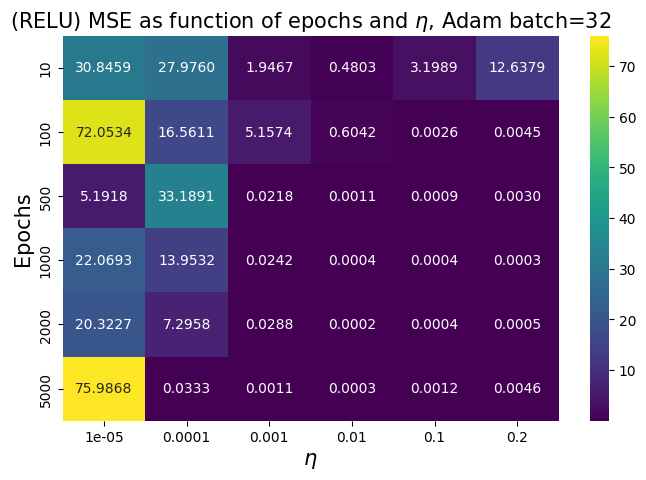

In [10]:
# Plotting: Adam, NEW ACTFUNC
save_dir = os.path.join(os.path.dirname(os.getcwd()), "Figures")
os.makedirs(save_dir, exist_ok=True)

fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(plot_matrix, annot=True, fmt=".4f", cmap="viridis", ax=ax, xticklabels=etas, yticklabels=epochs)
ax.set_xlabel(r"$\eta$", fontsize=15)
ax.set_ylabel("Epochs", fontsize=15)
ax.set_title(r"(RELU) MSE as function of epochs and $\eta$, Adam batch=32", fontsize=15)

save_path = os.path.join(save_dir, "V2_RELU_HM_ADAM_SGD.png")
fig.savefig(save_path, dpi=300, bbox_inches='tight')

In [11]:
# RMSprop, varying eta and epochs for batch size = 32. Runtime ~ 5m
state=50
datapoints=1000
noise_std=0.01

X_train, X_test, Y_train, Y_test, x_train, x_test, y_train, y_test = create_and_scale_data(state, datapoints, noise_std)

epochs = [10,100,500,1000,2000,5000]
etas = [1e-5, 1e-4, 1e-3, 1e-2, 2e-1, 1e-1]

plot_matrix = np.zeros((len(epochs), len(etas)))
for i, epoch in enumerate(epochs):
    for e, eta in enumerate(etas):
        linreg = NeuralNetwork(1, [50,1], [sigmoid, identity], [sigmoid_der, identity_der], mse, mse_der)
        linreg.train_SGD_v2(X_train, y_train, epochs=epoch, batch_size=32, learning_rate=eta, functional=NN_RMS)
        pred = linreg.feed_forward(X_test)
        pointMse = mse(y_test, pred)
        plot_matrix[i,e] = pointMse

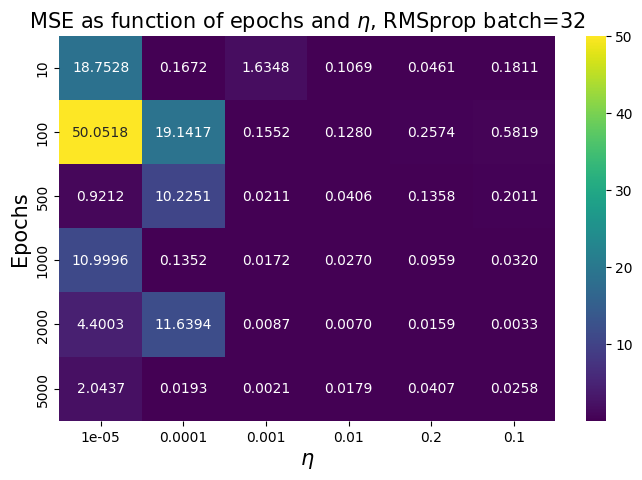

In [12]:
# Plotting: RMSprop, varying eta and epochs for batch size = 32
save_dir = os.path.join(os.path.dirname(os.getcwd()), "Figures")

os.makedirs(save_dir, exist_ok=True)

fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(plot_matrix, annot=True, fmt=".4f", cmap="viridis", ax=ax, xticklabels=etas, yticklabels=epochs)
ax.set_xlabel(r"$\eta$", fontsize=15)
ax.set_ylabel("Epochs", fontsize=15)
ax.set_title(r"MSE as function of epochs and $\eta$, RMSprop batch=32", fontsize=15)

save_path = os.path.join(save_dir, "V2_HM_RMS_SGD.png")
fig.savefig(save_path, dpi=300, bbox_inches='tight')

RMSprop with batch=32 best when {$\eta$=0.0001, 5000 epochs}. Alternatively: {$\eta$=0.001, 2000 epochs}.  
Comparing gradient methods with their best parameters: 

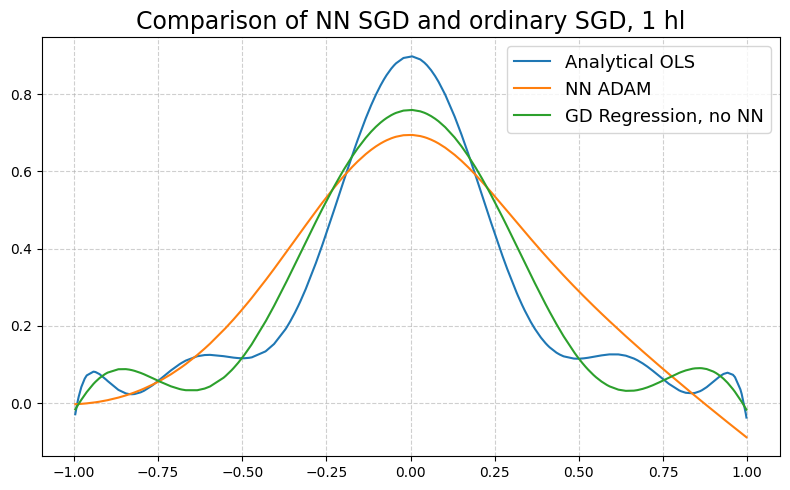

In [4]:
from classes import *

state=50
datapoints=1000
noise_std=0.01

act_funcs = [sigmoid, identity]
der_funcs = [sigmoid_der, identity_der]

X_train, X_test, Y_train, Y_test, x_train, x_test, y_train, y_test = create_and_scale_data(state, datapoints, noise_std)

# SGD
linreg3 = NeuralNetwork(1, [50,1], act_funcs, der_funcs, mse, mse_der)
linreg3.train_SGD_v2(X_train, y_train, epochs=2000, batch_size=32, learning_rate=0.1)
pred_Mom = linreg3.feed_forward(X_test)

# Adam
LinReg = NeuralNetwork(1, [50,1], act_funcs, der_funcs, mse, mse_der)
LinReg.train_SGD_v2(X_train, y_train, epochs=1000, batch_size=32, learning_rate=0.01, functional=NN_ADAM)
y_pred = LinReg.feed_forward(X_test)

# RMSprop
linreg2 = NeuralNetwork(1, [50,1], act_funcs, der_funcs, mse, mse_der)
linreg2.train_SGD_v2(X_train, y_train, epochs=2000, batch_size=32, learning_rate=0.001, functional=NN_RMS)
pred_ = linreg2.feed_forward(X_test)

Xtr_s, Xte_s, x_train2, x_test2, y_train2, y_test2 = create_and_scale_dataP1(state, datapoints, noise_std)

y_mean = np.mean(y_train2)
y_centered = y_train2 - y_mean
g = GradientDescent(Xtr_s,5000, y_train2, eps=1e-5, l1=False)
ols_betas = g.gradOrd(5000, eta=0.2)
predGD = Xte_s@ols_betas + y_mean
analytical_betas = ols(Xtr_s, y_train2)
predOls = Xte_s@analytical_betas + y_mean

sort_indices2 = np.argsort(x_test2.flatten())
sort_indices = np.argsort(x_test.flatten())

fig, ax = plt.subplots(figsize=(8, 5))

# ax.plot(x_test[sort_indices], pred_[sort_indices], label="NN RMSprop")
ax.plot(x_test2[sort_indices2], predOls[sort_indices2], label="Analytical OLS")
ax.plot(x_test[sort_indices], y_pred[sort_indices], label="NN ADAM")
# ax.plot(x_test[sort_indices], pred_Mom[sort_indices], label="NN SGD")
ax.plot(x_test2[sort_indices2], predGD[sort_indices2], label="GD Regression, no NN")

save_dir = os.path.join(os.path.dirname(os.getcwd()), "Figures")

os.makedirs(save_dir, exist_ok=True)

ax.set_title("Comparison of NN SGD and ordinary SGD, 1 hl", fontsize=17)
ax.legend(fontsize=13)
ax.grid(True, linestyle="--", alpha=0.6)
fig.tight_layout()

save_path = os.path.join(save_dir, "V2_comparison_fit_2layers_allSGD")
fig.savefig(save_path, dpi=300, bbox_inches="tight")


Comparing MSE scores

In [14]:
print("MSE for OLS using NN RMSprop:", round(mse(pred_, y_test), 4))
print("MSE for analytical OLS:", round(mse(predOls, y_test2), 4))
print("MSE for OLS using NN ADAM:", round(mse(y_pred, y_test), 4))
print("MSE for OLS using NN SGD:", round(mse(pred_Mom, y_test), 4))
print("MSE for OLS using plain GD:", round(mse(predGD, y_test2), 4))

MSE for OLS using NN RMSprop: 0.0085
MSE for analytical OLS: 0.0017
MSE for OLS using NN ADAM: 0.0175
MSE for OLS using NN SGD: 0.0198
MSE for OLS using plain GD: 0.0076


Comparing analytical OLS and OLS from gradient descent with Neural Net with two layers using 50 nodes per layer:

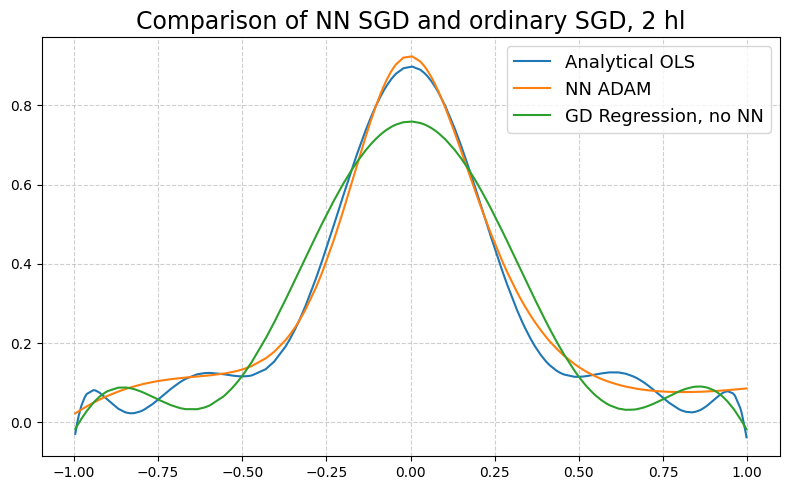

In [8]:
from classes import *

state=50
datapoints=1000
noise_std=0.01

X_train, X_test, Y_train, Y_test, x_train, x_test, y_train, y_test = create_and_scale_data(state, datapoints, noise_std)

# [output_list, func_list, der_list] = layer_setup(50, 2, sigmoid)  # [50, 50, 1], [sigmoid, sigmoid, identity], [sigmoid_der, sigmoid_der, identity_der]
output_list = [50, 50, 1]
func_list = [sigmoid, sigmoid, identity]
der_list = [sigmoid_der, sigmoid_der, identity_der]


# SGD
linreg3 = NeuralNetwork(1, output_list, func_list, der_list, mse, mse_der)
linreg3.train_SGD_v2(X_train, y_train, epochs=2000, batch_size=32, learning_rate=0.1)
pred_Mom = linreg3.feed_forward(X_test)

# Adam
LinReg = NeuralNetwork(1, output_list, func_list, der_list, mse, mse_der)
LinReg.train_SGD_v2(X_train, y_train, epochs=1000, batch_size=32, learning_rate=0.01, functional=NN_ADAM)
y_pred = LinReg.feed_forward(X_test)

# RMSprop
linreg2 = NeuralNetwork(1, output_list, func_list, der_list, mse, mse_der)
linreg2.train_SGD_v2(X_train, y_train, epochs=2000, batch_size=32, learning_rate=0.001, functional=NN_RMS)
pred_ = linreg2.feed_forward(X_test)

Xtr_s, Xte_s, x_train2, x_test2, y_train2, y_test2 = create_and_scale_dataP1(state, datapoints, noise_std)

y_mean = np.mean(y_train2)
y_centered = y_train2 - y_mean
g = GradientDescent(Xtr_s,5000, y_train2, eps=1e-5, l1=False)
ols_betas = g.gradOrd(5000, eta=0.2)
predGD = Xte_s@ols_betas + y_mean
analytical_betas = ols(Xtr_s, y_train2)
predOls = Xte_s@analytical_betas + y_mean

sort_indices2 = np.argsort(x_test2.flatten())
sort_indices = np.argsort(x_test.flatten())

fig, ax = plt.subplots(figsize=(8, 5))

# ax.plot(x_test[sort_indices], pred_[sort_indices], label="NN RMSprop")
ax.plot(x_test2[sort_indices2], predOls[sort_indices2], label="Analytical OLS")
ax.plot(x_test[sort_indices], y_pred[sort_indices], label="NN ADAM")
# ax.plot(x_test[sort_indices], pred_Mom[sort_indices], label="NN SGD")
ax.plot(x_test2[sort_indices2], predGD[sort_indices2], label="GD Regression, no NN")

save_dir = os.path.join(os.path.dirname(os.getcwd()), "Figures")

os.makedirs(save_dir, exist_ok=True)

ax.set_title("Comparison of NN SGD and ordinary SGD, 2 hl", fontsize=17)
ax.legend(fontsize=13)
ax.grid(True, linestyle="--", alpha=0.6)
fig.tight_layout()

save_path = os.path.join(save_dir, "V2_comparison_fit_3layers_allSGD")
fig.savefig(save_path, dpi=300, bbox_inches="tight")

Calculating and comparing MSE values

In [9]:
print("MSE for OLS using NN RMSprop:", round(mse(pred_, y_test), 4))
print("MSE for analytical OLS:", round(mse(predOls, y_test2), 4))
print("MSE for OLS using NN ADAM:", round(mse(y_pred, y_test), 4))
print("MSE for OLS using NN SGD:", round(mse(pred_Mom, y_test), 4))
print("MSE for OLS using plain GD:", round(mse(predGD, y_test2), 4))

MSE for OLS using NN RMSprop: 0.0071
MSE for analytical OLS: 0.0017
MSE for OLS using NN ADAM: 0.0011
MSE for OLS using NN SGD: 0.0027
MSE for OLS using plain GD: 0.0076
